In [1]:
import pyfits 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import astropy 
from astropy import cosmology 
import math as mt
from scipy.integrate import quad
from scipy.stats import chi2_contingency
from pylab import *
from scipy.optimize import curve_fit
import scipy as sp
import scipy.special
import scipy.stats as stats
import seaborn as sns 
import pandas as pd
from astropy.modeling.models import Sersic1D
from numpy import * 
import bces.bces
import nmmn.stats

#https://github.com/rsnemmen/BCES/blob/master/stats%20howto%20bces.ipynb

# Dataset: Width 50, 1000 points, Gaussian centered at 0

In [203]:
#test data 
y = np.random.normal(loc=0.0, scale=50.0, size=1000)   #y (center,std dev, #)
x = np.arange(0,1000) #x
y=np.random.normal(y)
x=np.random.normal(x)
errx = zeros(len(x)) #no errors 
erry = zeros(len(x))
cov=zeros(len(x))   # no correlation between error measurements
x = np.array(x)
y = np.array(y)

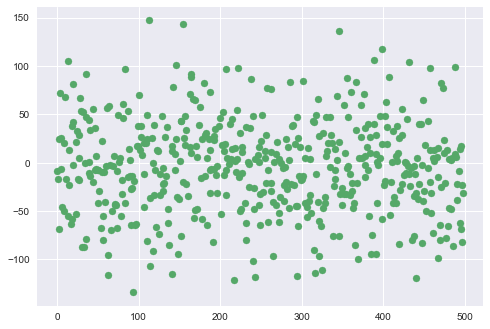

In [139]:
scatter(x,y)

plt.show()

# Non-linear function bootstrapping = bad

BCES, 10000 trials... 
3.499929 s


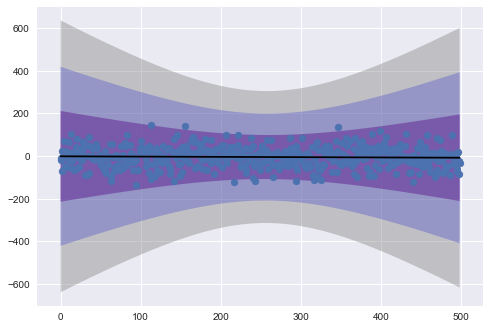

In [149]:

i = 0
nboot=10000   # number of bootstrapping trials
def func(x): return x[1]*x[0]+x[2]
a,b,aerr,berr,covab=bces.bces.bcesp(x,errx,y,erry,cov,nboot)
ybces=a[3]*x+b[3]  # the integer corresponds to the desired BCES method for plotting (3-ort, 0-y|x, 1-x|y, *don't use bissector*)
# array with best-fit parameters
fitm=np.array([ a[i],b[i] ])
# covariance matrix of parameter uncertainties
covm=np.array([ (aerr[i]**2,covab[i]), (covab[i],berr[i]**2) ])
# Gets lower and upper bounds on the confidence band 
lcb1,ucb1,xcb1=nmmn.stats.confbandnl(x,y,func,fitm,covm,2,0.68,x)
lcb2,ucb2,xcb2=nmmn.stats.confbandnl(x,y,func,fitm,covm,2,0.95,x)
lcb3,ucb3,xcb3=nmmn.stats.confbandnl(x,y,func,fitm,covm,2,0.997,x)
ax = plot(xcb1,a[i]*xcb1+b[i],'-k')
ax = fill_between(xcb1, lcb1, ucb1, alpha=0.6, facecolor='purple')
ax = fill_between(xcb2, lcb2, ucb2, alpha=0.3, facecolor='blue')
ax = fill_between(xcb3, lcb3, ucb3, alpha=0.4, facecolor='grey')
ax = scatter(x,y)
plt.show()

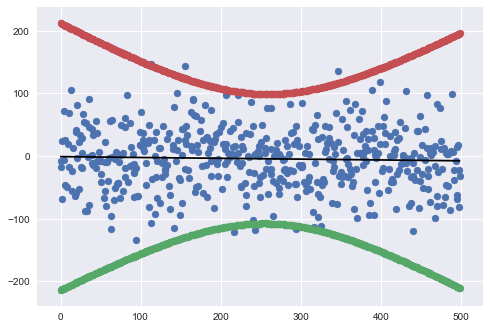

In [141]:
#1 sigma
scatter(x,y)
plot(xcb1,a[i]*xcb1+b[i],'-k')
scatter(x,lcb1)
scatter(x,ucb1)
plt.show()

In [204]:
count, bins, ignored = plt.hist(y, 50, normed=True)

In [205]:
plt.plot(bins, 1/(50 * np.sqrt(2 * np.pi)) *
...                np.exp( - (bins - 0)**2 / (2 * 50**2) ),
...          linewidth=2, color='r')

# Y Distribution of points = Gaussian 

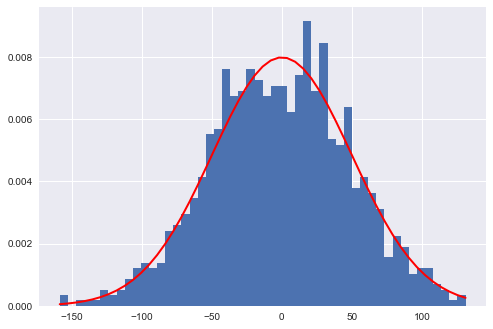

In [206]:
plt.show()

# Linear bootstrapping = good, same dataset as above 

In [ ]:
i = 0
nboot=10000   # number of bootstrapping trials
def func(x): return x[1]*x[0]+x[2]
a,b,aerr,berr,covab=bces.bces.bcesp(x,errx,y,erry,cov,nboot)
ybces=a[3]*x+b[3]  # the integer corresponds to the desired BCES method for plotting (3-ort, 0-y|x, 1-x|y, *don't use bissector*)
# array with best-fit parameters
fitm=np.array([ a[i],b[i] ])

In [228]:
lcb,ucb,x=nmmn.stats.confband(x, y, 0, b[i], 0.68, x)
lcb2,ucb2,x2=nmmn.stats.confband(x, y, 0, b[i], 0.95, x)
lcb3,ucb3,x3=nmmn.stats.confband(x, y, 0, b[i], 0.997, x)

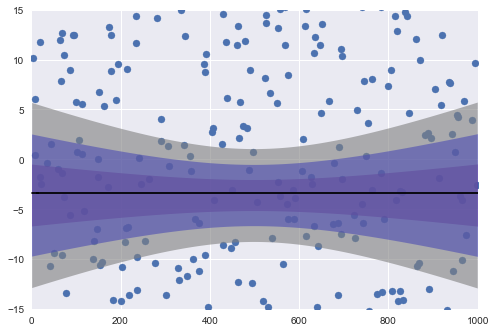

In [252]:
ax = plot(x,y1,'-k')
ax = scatter(x,y)
ax = fill_between(x, lcb, ucb, alpha=0.6, facecolor='purple')
ax = fill_between(x2, lcb2, ucb2, alpha=0.6, facecolor='blue')
ax = fill_between(x3, lcb3, ucb3, alpha=0.6, facecolor='grey')
ax = xlim(0,1000)
ax = ylim(-15,15)
plt.show()

# Expected width

In [254]:
sig1 = min(ucb)-max(lcb)
print sig1
print('Expected width is 3.2')

3.11650432881
Expected width is 3.2


In [253]:
sig2 = min(ucb2)-max(lcb2)
print sig2
print('Expected width is 6.4')

6.14667164455
Expected width is 6.4


In [247]:
mean(y)

-1.4383207899222321